In [17]:
from data_preprocessing import load_nfl_data

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tabulate import tabulate as tb
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize

# ignore FutureWarning
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [18]:
X, y = load_nfl_data('nfl-play-by-play-2009-2018.csv')

X = normalize(X)
y = normalize(y)

X_train, X_test, y_train, y_test  = train_test_split(X, y, test_size=0.2, random_state=42)

/Users/robbykapua/Documents/GitHub/NFL-Play-Predictor/data_preprocessing.py:56: DtypeWarning: Columns (42,166,167,168,169,174,175,178,179,182,183,188,189,190,191,194,195,203,204,205,218,219,220,231,232,233,238,240,241,249) have mixed types. Specify dtype option on import or set low_memory=False.
  nfl_play_data: pd.DataFrame = pd.read_csv(file_path)


In [19]:
clf_results = []
neighbors = np.arange(1, 31)
for k in neighbors:
    clf = KNeighborsClassifier(n_neighbors=k, weights='distance')
    clf.fit(X_train, y_train)
    score = clf.score(X_test, y_test)
    clf_results.append((k, score))

In [20]:
print(f'Best K: {(best_clf_k := max(clf_results, key=lambda x: x[1]))[0]} with a score of {best_clf_k[1]:.4f}')
print(f'Worst K: {(worst_clf_k := min(clf_results, key=lambda x: x[1]))[0]} with a score of {worst_clf_k[1]:.4f}')

Best K: 30 with a score of 0.6660
Worst K: 1 with a score of 0.6016


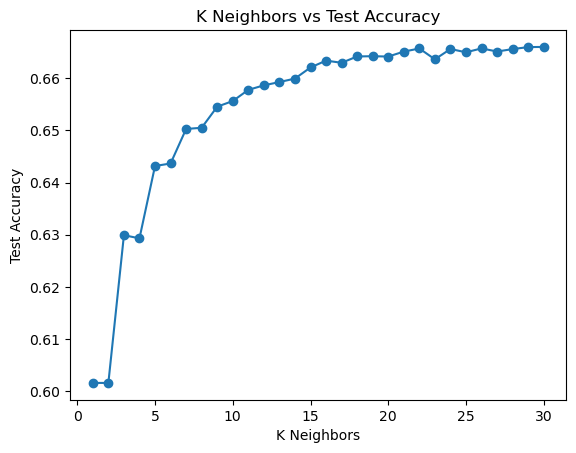

In [21]:
plt.plot(*zip(*clf_results), marker='o')
plt.title('K Neighbors vs Test Accuracy')
plt.xlabel('K Neighbors')
plt.ylabel('Test Accuracy')
plt.show()

In [22]:
from sklearn.metrics import classification_report, accuracy_score

clf = KNeighborsClassifier(n_neighbors=best_clf_k[0], weights='distance')
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred))
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")

              precision    recall  f1-score   support

           0       0.70      0.75      0.72     34995
           1       0.61      0.55      0.58     25104

   micro avg       0.67      0.67      0.67     60099
   macro avg       0.66      0.65      0.65     60099
weighted avg       0.66      0.67      0.66     60099
 samples avg       0.67      0.67      0.67     60099

Accuracy: 0.6660


In [23]:
regress_results = []
neighbors = np.arange(1, 31)
for k in neighbors:
    regress = KNeighborsRegressor(n_neighbors=k, weights='distance')
    regress.fit(X_train, y_train)
    regress_results.append((k, mean_absolute_error(y_test, regress.predict(X_test))))

In [24]:
print(f'Best K: {(best_regress_k := min(regress_results, key=lambda x: x[1]))[0]} with a score of {best_regress_k[1]:.4f}')
print(f'Worst K: {(worst_regress_k := max(regress_results, key=lambda x: x[1]))[0]} with a score of {worst_regress_k[1]:.4f}')

Best K: 1 with a score of 0.3984
Worst K: 30 with a score of 0.4204


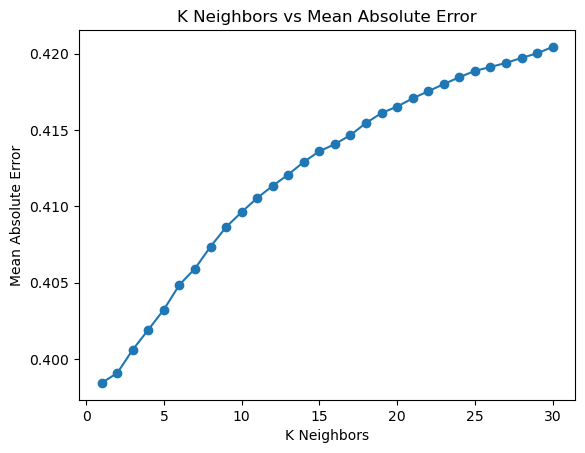

In [25]:
plt.plot(*zip(*regress_results), marker='o')
plt.title('K Neighbors vs Mean Absolute Error')
plt.xlabel('K Neighbors')
plt.ylabel('Mean Absolute Error')
plt.show()